In [1]:
# Dataframe manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.cm as cmx
import matplotlib.colors as colors
# plt.style.use('fivethirtyeight')
sns.set(style = 'whitegrid',context = 'notebook')

# NLP
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
import string
from scipy.spatial.distance import pdist, squareform
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.metrics.pairwise import cosine_similarity


#Import common utilities
import math
from math import sqrt
from collections import Counter

# statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# Preprocessing
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, Imputer, LabelEncoder, Normalizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, Normalizer

# Modelling Helpers:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


# Load data

### review.csv

In [4]:
# reviews
df = pd.read_csv('london_reviews.csv')
df.shape   

(1176072, 6)

In [5]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9554,1184025,2012-04-26,1809049,Hana,"I stayed in London for a month to study, exp..."
1,9554,1206322,2012-04-30,2237488,Rishi,My bnb request was very last minute and i was ...
2,9554,1258541,2012-05-10,2150467,Panee,First time as airbnb!First time to London! I c...
3,9554,1405284,2012-06-03,1864672,Simone Cristina,A wonderful experience! The house is very well...
4,9554,1475969,2012-06-13,2438453,Sondra,We are so grateful that we trusted our intuiti...


### listing.csv

In [78]:
train_listing_df = pd.read_csv('preprocessed_train_exp05.csv')
test_listing_df = pd.read_csv('preprocessed_test_exp05.csv')
listing_df = pd.concat([train_listing_df,test_listing_df], axis= 0)

In [79]:
print(listing_df.shape)
listing_df.head()

(76855, 39)


,id,cleaning_fee,review_scores_value,review_scores_location,review_scores_checkin,review_scores_accuracy,review_scores_communication,review_scores_cleanliness,review_scores_rating,reviews_per_month,bathrooms,beds,bedrooms,host_listings_count,host_total_listings_count,number_of_reviews,latitude,longitude,accommodates,availability_60,availability_30,availability_365,availability_90,guests_included,extra_people,calculated_host_listings_count,maximum_nights,minimum_nights,host_is_superhost_f,host_is_superhost_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Private,room_type_Shared,good_nbh,price
0,4063841,0.0570,0.6250,0.6250,0.6250,0.7500,0.7500,0.3750,0.7500,0.0030,0.1818,0.2000,0.0909,0.0007,0.0007,0.0038,0.4451,0.2678,0.4667,0.2000,0.4000,0.0329,0.1333,0.0000,0.0000,0.0000,0.0000,0.0053,1,0,0,0,1,0,0,0,0,1,160.0000
1,20231469,0.0651,0.8750,0.8750,1.0000,1.0000,1.0000,1.0000,1.0000,0.0187,0.0909,0.1000,0.0455,0.0013,0.0013,0.0095,0.7208,0.5448,0.1333,0.0000,0.0000,0.0000,0.0000,0.0435,0.0638,0.0000,0.0000,0.0810,1,0,0,0,1,0,0,0,0,0,77.0000
2,23712985,0.0326,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0091,0.0909,0.0500,0.0000,0.0007,0.0007,0.0019,0.6515,0.4477,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0053,1,0,0,0,0,0,0,1,0,1,26.0000
3,1080216,0.0326,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0236,0.1364,0.0500,0.0227,0.0013,0.0013,0.0227,0.3380,0.4748,0.0667,0.0667,0.0000,0.0932,0.3778,0.0000,0.0426,0.0009,0.0000,0.0018,0,1,1,0,0,0,0,1,0,0,25.0000
4,5703142,0.0326,1.0000,0.8750,1.0000,1.0000,1.0000,1.0000,0.9625,0.0127,0.2273,0.3500,0.0909,0.0007,0.0007,0.0170,0.3818,0.4363,0.4000,0.0500,0.0667,0.0082,0.0333,0.0000,0.0000,0.0000,0.0000,0.0036,1,0,0,0,1,0,0,0,0,0,180.0000


# Data Exploration

# Word cloud

# Sentiment Analysis

https://www.udemy.com/course/nlp-natural-language-processing-with-python/learn/lecture/13067618#content

In [7]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
sid = SentimentIntensityAnalyzer()

In [9]:
df.comments.isnull().sum()

1331

In [10]:
df.loc[df.comments.isnull(),:]

,listing_id,id,date,reviewer_id,reviewer_name,comments
129,9554,297570965,2018-07-28,172807838,Sagar,NaN
2744,43129,96984243,2016-08-25,88208764,James,NaN
3331,47192,106673,2010-09-27,35017,David,NaN
3592,47192,115746728,2016-11-26,39169944,David,NaN
3763,47369,248916533,2018-04-01,45533649,Ireen,NaN
5378,71875,114266016,2016-11-17,102871190,תהילה,NaN
5742,75120,171406294,2017-07-17,30169587,Victor,NaN
5748,75120,207907502,2017-10-30,48752837,Anssi,NaN
7124,83308,558591,2011-09-23,831042,Carine,NaN
7125,83308,644321,2011-10-19,1184768,Donna,NaN


In [12]:
df = df[df.comments.isnull() == False]
df.shape

(1174741, 6)

In [14]:
df.iloc[0]['comments']

'I  stayed  in London for a month to study, explore the city, and meet people along the way.  \r\n\r\nI think the area is a great place to set your base. The neighborhood is lively and friendly, with an eclectic mix of ethic restaurants, colorful grocery stores and a happening pub that stays open late. There’s a big, green park nearby which is great for running or having a coffee. Central London is twenty minutes away by Tube.\r\n\r\nThe apartment is charming, ceiling to floor. It actually does look even better than in the photos! The guest-room is bright and well heated, with a beautiful work desk and a spacious closet.  The kitchen is spacious and smells of fresh espresso in the morning. \r\n\r\nGuy is a friendly, reliable, easy- going host who knows (and loves!) London. Make sure to ask about the must-go London pubs and places to eat! \r\n\r\nAll in all, I’d wholeheartedly recommend the apartment and the neighborhood, not to mention the curry house down the street!  Enjoy !!! \r\n'

In [13]:
sid.polarity_scores(df.iloc[0]['comments'])

{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.993}

In [15]:
df['score'] = df['comments'].apply(lambda comments: sid.polarity_scores(comments))

In [16]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,score
0,9554,1184025,2012-04-26,1809049,Hana,"I stayed in London for a month to study, exp...","{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp..."
1,9554,1206322,2012-04-30,2237488,Rishi,My bnb request was very last minute and i was ...,"{'neg': 0.066, 'neu': 0.759, 'pos': 0.175, 'co..."
2,9554,1258541,2012-05-10,2150467,Panee,First time as airbnb!First time to London! I c...,"{'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'comp..."
3,9554,1405284,2012-06-03,1864672,Simone Cristina,A wonderful experience! The house is very well...,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'comp..."
4,9554,1475969,2012-06-13,2438453,Sondra,We are so grateful that we trusted our intuiti...,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp..."


In [18]:
df['compound'] = df['score'].apply(lambda d:d['compound'])

In [27]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,score,compound
0,9554,1184025,2012-04-26,1809049,Hana,"I stayed in London for a month to study, exp...","{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.9930
1,9554,1206322,2012-04-30,2237488,Rishi,My bnb request was very last minute and i was ...,"{'neg': 0.066, 'neu': 0.759, 'pos': 0.175, 'co...",0.7901
2,9554,1258541,2012-05-10,2150467,Panee,First time as airbnb!First time to London! I c...,"{'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'comp...",0.9958
3,9554,1405284,2012-06-03,1864672,Simone Cristina,A wonderful experience! The house is very well...,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'comp...",0.9712
4,9554,1475969,2012-06-13,2438453,Sondra,We are so grateful that we trusted our intuiti...,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...",0.9873


In [20]:
# display various ranges 
pd.options.display.float_format = '{:.4f}'.format
df['compound'].describe()

count   1174741.0000
mean          0.7136
std           0.4061
min          -0.9988
25%           0.6597
50%           0.9023
75%           0.9610
max           0.9997
Name: compound, dtype: float64

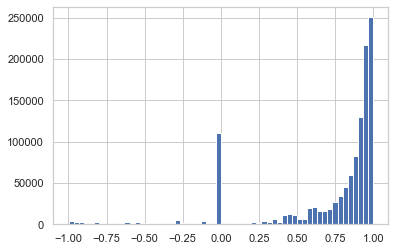

In [23]:
df['compound'].hist(bins = 60)

In [34]:
df['length'] = df.comments.apply(len)

In [35]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,score,compound,length
0,9554,1184025,2012-04-26,1809049,Hana,"I stayed in London for a month to study, exp...","{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.9930,979
1,9554,1206322,2012-04-30,2237488,Rishi,My bnb request was very last minute and i was ...,"{'neg': 0.066, 'neu': 0.759, 'pos': 0.175, 'co...",0.7901,341
2,9554,1258541,2012-05-10,2150467,Panee,First time as airbnb!First time to London! I c...,"{'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'comp...",0.9958,1035
3,9554,1405284,2012-06-03,1864672,Simone Cristina,A wonderful experience! The house is very well...,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'comp...",0.9712,305
4,9554,1475969,2012-06-13,2438453,Sondra,We are so grateful that we trusted our intuiti...,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...",0.9873,675


### save data 

In [36]:
df.to_csv('review_sentiment_score.csv')

### group data

In [37]:
compound_df = df[['listing_id','id','compound','length']]
compound_df.head()

,listing_id,id,compound,length
0,9554,1184025,0.9930,979
1,9554,1206322,0.7901,341
2,9554,1258541,0.9958,1035
3,9554,1405284,0.9712,305
4,9554,1475969,0.9873,675


In [99]:
review_df = pd.DataFrame(compound_df.groupby(['listing_id'])['id'].count())
review_df['avg_score'] = compound_df.groupby(['listing_id'])['compound'].mean()
review_df['min_score'] = compound_df.groupby(['listing_id'])['compound'].min()
review_df['max_score'] = compound_df.groupby(['listing_id'])['compound'].max()
review_df['avg_len'] = compound_df.groupby(['listing_id'])['length'].mean()
review_df.head()

,id,avg_score,min_score,max_score,avg_len
listing_id,,,,,
9554,132,0.8375,-0.9136,0.9958,356.9167
11076,3,0.4630,0.0000,0.9485,60.3333
13913,14,0.8759,0.0000,0.9954,313.7143
17402,39,0.6994,-0.8316,0.9938,401.5897
24328,92,0.7836,-0.7003,0.9966,396.7500


In [100]:
review_df = review_df.reset_index()
review_df.rename(columns={'id':'count'}, inplace=True)
review_df.columns

Index(['listing_id', 'count', 'avg_score', 'min_score', 'max_score', 'avg_len'], dtype='object')

In [101]:
review_df = listing_df[['id','price']].merge(review_df,how='left',left_on='id',right_on='listing_id')
review_df.head()

,id,price,listing_id,count,avg_score,min_score,max_score,avg_len
0,4063841,160.0000,4063841.0000,2.0000,0.9047,0.8313,0.9781,214.5000
1,20231469,77.0000,20231469.0000,5.0000,0.5761,0.0000,0.9780,215.2000
2,23712985,26.0000,23712985.0000,1.0000,0.0000,0.0000,0.0000,87.0000
3,1080216,25.0000,1080216.0000,12.0000,0.9114,0.7096,0.9937,343.9167
4,5703142,180.0000,5703142.0000,9.0000,0.5726,0.0000,0.9689,234.4444


In [103]:
review_df.corr()

,id,price,listing_id,count,avg_score,min_score,max_score,avg_len
id,1.0000,0.0890,1.0000,-0.3644,-0.1228,0.2331,-0.1592,-0.2568
price,0.0890,1.0000,0.0414,-0.0899,0.0023,0.0507,-0.0118,0.0875
listing_id,1.0000,0.0414,1.0000,-0.3644,-0.1228,0.2331,-0.1592,-0.2568
count,-0.3644,-0.0899,-0.3644,1.0000,0.0630,-0.5016,0.1894,0.0672
avg_score,-0.1228,0.0023,-0.1228,0.0630,1.0000,0.4705,0.7465,0.1775
min_score,0.2331,0.0507,0.2331,-0.5016,0.4705,1.0000,-0.0076,-0.0297
max_score,-0.1592,-0.0118,-0.1592,0.1894,0.7465,-0.0076,1.0000,0.1827
avg_len,-0.2568,0.0875,-0.2568,0.0672,0.1775,-0.0297,0.1827,1.0000


In [106]:
review_df = review_df.drop(['id'],axis=1)
review_df.head()

,price,listing_id,count,avg_score,min_score,max_score,avg_len
0,160.0000,4063841.0000,2.0000,0.9047,0.8313,0.9781,214.5000
1,77.0000,20231469.0000,5.0000,0.5761,0.0000,0.9780,215.2000
2,26.0000,23712985.0000,1.0000,0.0000,0.0000,0.0000,87.0000
3,25.0000,1080216.0000,12.0000,0.9114,0.7096,0.9937,343.9167
4,180.0000,5703142.0000,9.0000,0.5726,0.0000,0.9689,234.4444


[]

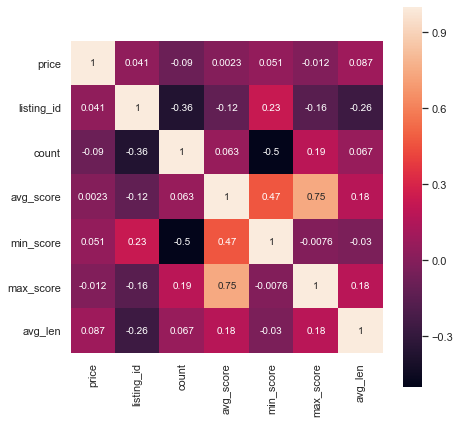

In [108]:
corr= review_df.corr()
plt.figure(figsize = (7,7))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)
plt.plot()

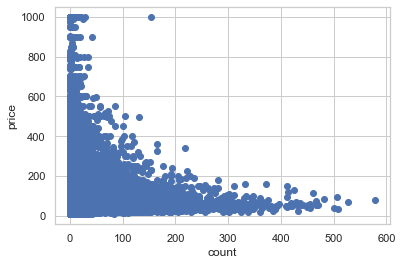

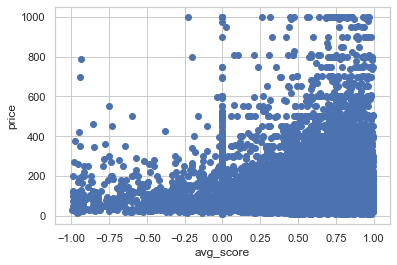

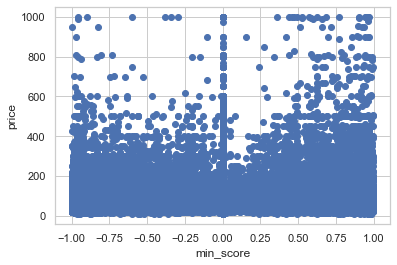

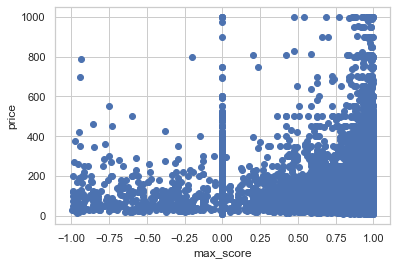

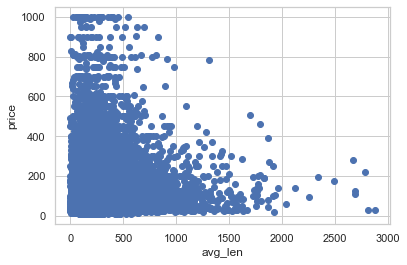

In [111]:
for var in review_df.drop(['listing_id','price'],axis=1):
    plt.scatter(review_df[var],review_df['price'])
    plt.xlabel(var)
    plt.ylabel('price')
    plt.show()

In [112]:
selected_vars = ['count','avg_score','min_score','max_score','avg_len']
X = review_df[selected_vars]
y = review_df['price']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=0) # we are setting the seed here
X_train.shape, X_test.shape

((69169, 5), (7686, 5))

In [116]:
import statsmodels.formula.api as smf
features = X_train.columns.values
formula = f'price ~ {"+".join(features)}'
train_df = pd.concat([X_train,y_train], axis = 1)
model = smf.ols(formula = formula,data=train_df).fit()

In [117]:
model.params

Intercept   92.9833
count       -0.2006
avg_score   -8.9018
min_score    3.5827
max_score    2.3623
avg_len      0.0553
dtype: float64

In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     180.8
Date:                Thu, 09 Apr 2020   Prob (F-statistic):          1.81e-191
Time:                        21:50:53   Log-Likelihood:            -3.0369e+05
No. Observations:               51743   AIC:                         6.074e+05
Df Residuals:                   51737   BIC:                         6.074e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.9833      1.526     60.913      0.000      89.991      95.975
count         -0.2006      0.014    -14.854      0.000      -0.227      -0.174
avg_score     -8.9018      3.515     -2.533      0.011     -15.791      -2.013
min_score      3.5827      1.113      3.219      0.001       1.401       5.764
max_score      2.3623      3.076      0.768      0.442      -3.666       8.391
avg_len        0.0553      0.003     21.593      0.000       0.050       0.060
==============================================================================
Omnibus:                    40142.936   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1152547.393
Skew:                           3.528   Prob(JB):                         0.00
Kurtosis:                      25.018   Cond. No.                     3.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
pred_train = model.predict(X_train)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

Train prediction:  [98.55729261497176, 96.43753818378181, 96.04166384536015, 95.36011696478573, 94.17810318901138]
Train true label:  [155.0, 22.0, 100.0, 240.0, 120.0]

Test prediction:  [100.43156585889072, 97.90361364996461, 96.20384742398707, 103.25446131582471, 112.6502744450127]
Test true label:  [145.0, 39.0, 73.0, 102.0, 45.0]

Average house price:  80.0


In [120]:
model.rsquared

0.01717158319796419

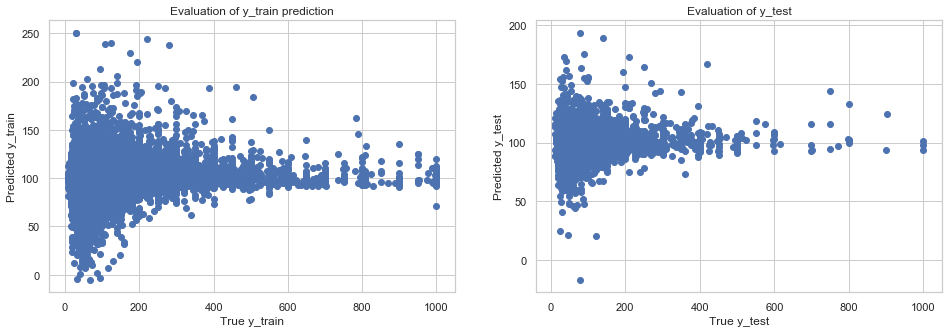

In [121]:
fig, axes = plt.subplots(1,2,figsize=(16,5))

axes[0].scatter(y_train, model.predict(X_train))
axes[0].set_xlabel('True y_train')
axes[0].set_ylabel('Predicted y_train')
axes[0].set_title('Evaluation of y_train prediction')

axes[1].scatter(y_test, model.predict(X_test))
axes[1].set_xlabel('True y_test')
axes[1].set_ylabel('Predicted y_test')
axes[1].set_title('Evaluation of y_test')

fig.show()

In [122]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [123]:
X_train.isnull().sum()

count        17426
avg_score    17426
min_score    17426
max_score    17426
avg_len      17426
dtype: int64

In [124]:
X_train.head()

,count,avg_score,min_score,max_score,avg_len
6065,61.0000,0.7823,-0.4199,0.9963,432.7049
40338,6.0000,0.3444,0.0000,0.9796,97.8333
52174,5.0000,0.8437,0.4404,0.9678,139.4000
2377,43.0000,0.8232,-0.1280,0.9911,297.4651
8479,2.0000,0.2202,0.0000,0.4404,45.5000


In [125]:
review_df.isnull().sum()

price             0
listing_id    19374
count         19374
avg_score     19374
min_score     19374
max_score     19374
avg_len       19374
dtype: int64

# Vectorization